# Parametric Alternating Encoding

## Initialisation

In [336]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit

## Replection of the Vault 5

In [77]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

In [322]:
circ.clear()
circ.h(0)
circ.h(1)
circ.h(2)
circ.cx(1, 2)
circ.cx(0, 2)
circ.cx(0, 1)

#circ.cx(0, 2)
#circ.cx(1, 2)
circ.h(2)
circ.h(1)
circ.h(0)

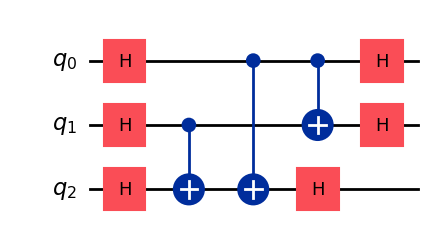

In [323]:
circ.draw('mpl', style="iqp")

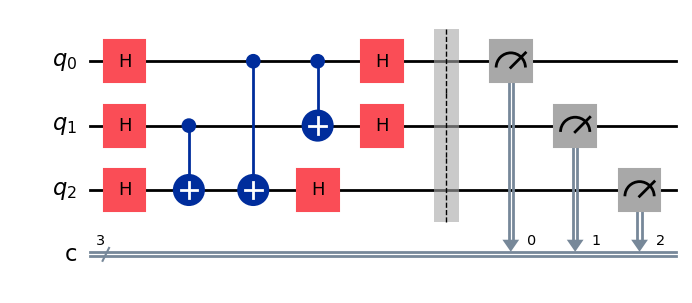

In [324]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before) 
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circ, range(3), front=True)

#drawing the circuit
qc.draw('mpl', style="iqp")


In [325]:
from qiskit import transpile 

# Use AerSimulator
from qiskit_aer import AerSimulator

backend = AerSimulator()

# First we have to transpile the quantum circuit 
# to the low-level QASM instructions used by the 
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=200)

# Grab the results from the job.
result_sim = job_sim.result()


In [326]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'000': 200}


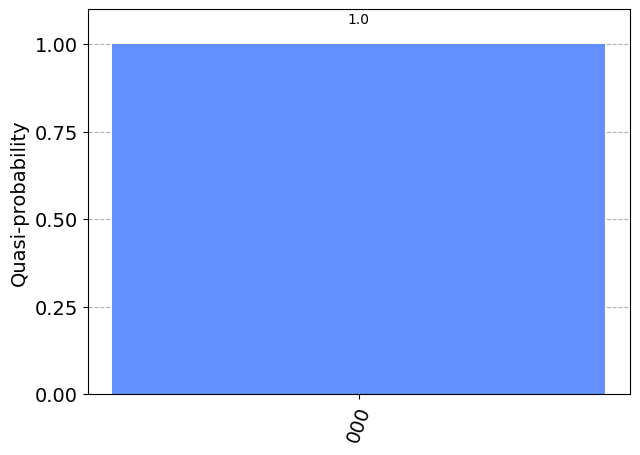

In [327]:
from qiskit.visualization import plot_histogram
for item in counts:
    counts[item] = counts[item] / 200
plot_histogram(counts)

In [442]:
def MPS(num_qubits):
    """
    Constructs a Matrix Product State (MPS) quantum circuit.

    Args:
        num_qubits (int): The number of qubits in the circuit.
        **kwargs: Additional keyword arguments to be passed to the 
        RealAmplitudes.

    Returns:
        QuantumCircuit: The constructed MPS quantum circuit.
        
    """
    qc = QuantumCircuit(num_qubits)
    qubits = range(num_qubits)

    # Iterate over adjacent qubit pairs
    for i, j in zip(qubits[:-1], qubits[1:]):
        qc.compose(qiskit.circuit.library.RealAmplitudes(num_qubits=2,
                                  parameter_prefix=f'θ_{i},{j}', 
                                  entanglement="linear",
                                  skip_final_rotation_layer=True), [i, j],
                   inplace=True)
        qc.barrier(
        )  # Add a barrier after each block for clarity and separation

    return qc

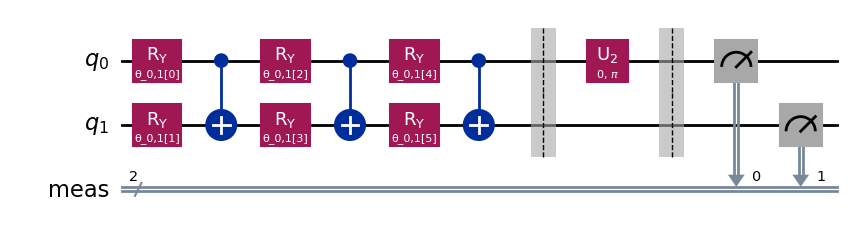

In [454]:
num_qubits = 2
mps = MPS(num_qubits)
mps.h(0)
#mps = meas.compose(mps, [0, 1], front="true")
mps.measure_all()
mps.decompose().draw('mpl', style="iqp")

In [459]:
qubits = range(num_qubits)
# Iterate over adjacent qubit pairs
#for i, j in zip(qubits[:-1], qubits[1:]):
 #   mps.assign_parameters({f'θ_{i},{j}': np.pi/2})
    
for par in mps.parameters:
    mps = mps.assign_parameters({par: np.pi/2})
    
#mps.decompose().draw('mpl', style="iqp")
    
    #print(par)

mps_compiled = transpile(mps, backend)

job_sim = backend.run(mps_compiled, shots=1000)

result_sim = job_sim.result()

counts = result_sim.get_counts(mps_compiled)
print(counts)

{'11': 1, '01': 94, '00': 566, '10': 339}


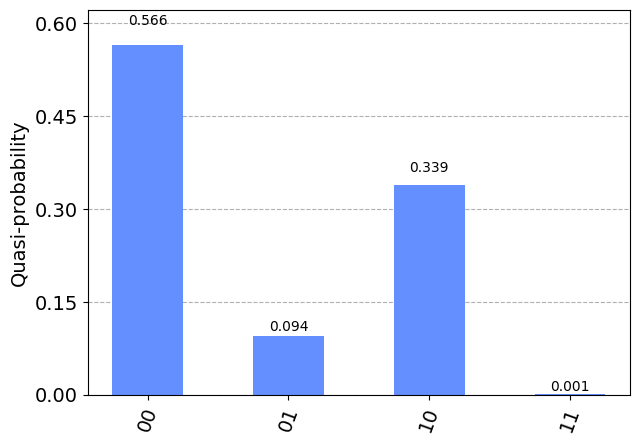

In [460]:
from qiskit.visualization import plot_histogram
for item in counts:
    counts[item] = counts[item] / 1000
plot_histogram(counts)